In [65]:
import os
import subprocess

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import open3d as o3d
import cv2

import json
import zipfile

current_directory = os.getcwd()

## File Extraction / Unzipping Intructions
**Note:** These steps should be performed only at the beginning of the process.

In [52]:
scans_directory = os.path.join(current_directory, "data/scans")
output_dir = os.path.join(current_directory, "outputs/reader")

def run_reader(filename, output_path):
    command = [
        "python",
        "scripts/SensReader/reader.py",
        "--filename",
        filename,
        "--output_path",
        output_path,
        #"--export_depth_images",
        "--export_color_images"
        #"--export_poses",
        #"--export_intrinsics"
    ]
    subprocess.run(command)

for folder in os.listdir(scans_directory):
    if folder.startswith("scene"):
        sensor_file = os.path.join(scans_directory, folder, f"{folder}.sens")
        output_path = os.path.join(output_dir, folder)
        if os.path.isfile(sensor_file):
            run_reader(sensor_file, output_path)
        else:
            print(f"Sensor file not found for {folder}")

zip_files_dir = os.path.join(current_directory, "data/scans")
output_dir = os.path.join(current_directory, "outputs/2d-zip")

def unzip_file(zip_file_path, output_dir):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(output_dir)

for folder in os.listdir(zip_files_dir):
    if folder.startswith("scene"):
        zip_file = os.path.join(scans_directory, folder, f"{folder}_2d-instance-filt.zip")
        output_path = os.path.join(output_dir, f"{folder}")
        unzip_file(zip_file, output_path)

Namespace(filename='/Users/lara/Desktop/Making-CLIP-features-multiview-consistent/data/scans/scene0000_02/scene0000_02.sens', output_path='/Users/lara/Desktop/Making-CLIP-features-multiview-consistent/outputs/reader/scene0000_02', export_depth_images=False, export_color_images=True, export_poses=False, export_intrinsics=False)
loading /Users/lara/Desktop/Making-CLIP-features-multiview-consistent/data/scans/scene0000_02/scene0000_02.sens...loaded!
exporting 6170 color frames to /Users/lara/Desktop/Making-CLIP-features-multiview-consistent/outputs/reader/scene0000_02/color
Namespace(filename='/Users/lara/Desktop/Making-CLIP-features-multiview-consistent/data/scans/scene0001_01/scene0001_01.sens', output_path='/Users/lara/Desktop/Making-CLIP-features-multiview-consistent/outputs/reader/scene0001_01', export_depth_images=False, export_color_images=True, export_poses=False, export_intrinsics=False)
loading /Users/lara/Desktop/Making-CLIP-features-multiview-consistent/data/scans/scene0001_01

## Select scene, class and instance

In [123]:
scene = "scene0000_00"

scene_path = os.path.join(current_directory, "data/scans", scene)

The class must be chosen among one of the raw_category in the [scannetv2-labels.combinesd.tsv](data/scannetv2-labels.combined.tsv)

In [124]:
class_name = 'bed'

with open(os.path.join(scene_path, scene + '.aggregation.json')) as f:
    aggregation_data = json.load(f)

object_ids = []
for seg_group in aggregation_data['segGroups']:
    if seg_group['label'] == class_name:
        object_ids.append(seg_group['objectId'])

if not object_ids:
    print("No objects found for class:", class_name)
else:
    print(f"Found {len(object_ids)} objects for class {class_name}: {object_ids}")

Found 1 objects for class bed: [37]


In [127]:
instance_id = 37

instance_id = instance_id + 1
map_file = os.path.join(current_directory, "data/scannetv2-labels.combined.tsv")
instances_dir = os.path.join(current_directory, "outputs/2d-zip", scene, "instance-filt")
original_dir = os.path.join(current_directory, "outputs/reader", scene, "color")

def get_labels(instances_img):
    labels = instances_img // 1000
    return labels.astype(np.uint8)

def get_instances(instances_img):
    ids = instances_img % 1000
    return ids.astype(np.uint8)

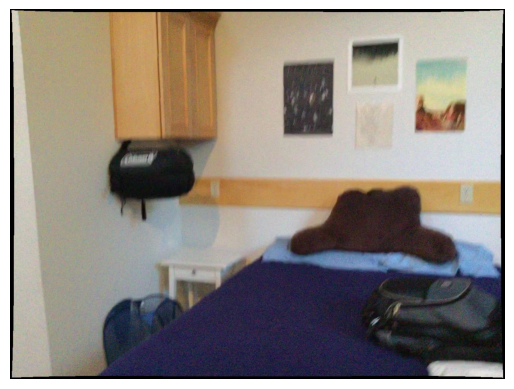

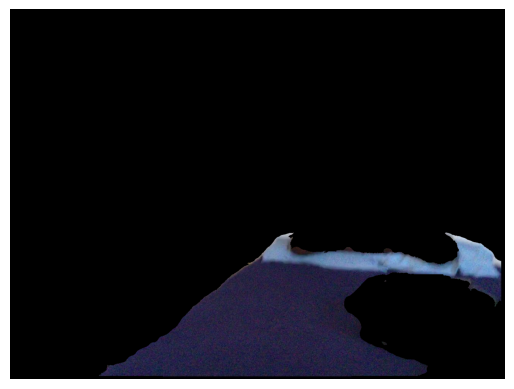

In [130]:
instances_img_path = os.path.join(instances_dir, "900.png")
original_img_path = os.path.join(original_dir, "900.jpg")

instances_img = imageio.imread(instances_img_path)
original_img = imageio.imread(original_img_path)

instance_ids = get_instances(instances_img)
binary_mask = (instance_ids == instance_id).astype(np.uint8)

masked_img = original_img * binary_mask[:, :, None]

plt.imshow(original_img)
plt.axis('off')
plt.show()

plt.imshow(masked_img)
plt.axis('off')
plt.show()
